In [58]:
import pandas as pd
from datetime import datetime
import os
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import random

In [59]:
cwd = os.getcwd()
print(cwd)
data = glob.glob(os.path.join(cwd,"*.csv"))

/home/daniel/Desktop/vanilla/week8


In [60]:
print(data)

['/home/daniel/Desktop/vanilla/week8/tuesday.csv', '/home/daniel/Desktop/vanilla/week8/thursday.csv', '/home/daniel/Desktop/vanilla/week8/monday.csv', '/home/daniel/Desktop/vanilla/week8/wednesday.csv', '/home/daniel/Desktop/vanilla/week8/friday.csv', '/home/daniel/Desktop/vanilla/week8/customers_all.csv']


In [61]:
df_mon = pd.read_csv('/home/daniel/Desktop/vanilla/week8/monday.csv', sep = ';', parse_dates=['timestamp'])

In [62]:
df_mon.head()

,timestamp,customer_no,location
0,2019-09-02 07:03:00,1,dairy
1,2019-09-02 07:03:00,2,dairy
2,2019-09-02 07:04:00,3,dairy
3,2019-09-02 07:04:00,4,dairy
4,2019-09-02 07:04:00,5,spices


In [63]:
df_mon['day']= 'Monday'

In [64]:
df_mon.head()

,timestamp,customer_no,location,day
0,2019-09-02 07:03:00,1,dairy,Monday
1,2019-09-02 07:03:00,2,dairy,Monday
2,2019-09-02 07:04:00,3,dairy,Monday
3,2019-09-02 07:04:00,4,dairy,Monday
4,2019-09-02 07:04:00,5,spices,Monday


In [65]:
df_mon.dtypes

timestamp      datetime64[ns]
customer_no             int64
location               object
day                    object
dtype: object

In [66]:
df_tue = pd.read_csv('/home/daniel/Desktop/vanilla/week8/tuesday.csv', sep = ';', parse_dates=['timestamp'])

In [67]:
df_tue['day']='Tuesday'

In [68]:
df_tue.head()

,timestamp,customer_no,location,day
0,2019-09-03 07:02:00,1,fruit,Tuesday
1,2019-09-03 07:02:00,2,drinks,Tuesday
2,2019-09-03 07:03:00,3,dairy,Tuesday
3,2019-09-03 07:05:00,1,drinks,Tuesday
4,2019-09-03 07:06:00,4,dairy,Tuesday


In [69]:
df_wed = pd.read_csv('/home/daniel/Desktop/vanilla/week8/wednesday.csv', sep = ';', parse_dates=['timestamp'])

In [70]:
df_wed['day']='Wednesday'

In [71]:
df_wed.head()

,timestamp,customer_no,location,day
0,2019-09-04 07:00:00,1,fruit,Wednesday
1,2019-09-04 07:00:00,2,dairy,Wednesday
2,2019-09-04 07:00:00,3,fruit,Wednesday
3,2019-09-04 07:00:00,4,fruit,Wednesday
4,2019-09-04 07:00:00,5,dairy,Wednesday


In [72]:
df_thu = pd.read_csv('/home/daniel/Desktop/vanilla/week8/thursday.csv', sep = ';', parse_dates=['timestamp'])

In [73]:
df_thu['day']='Thursday'

In [74]:
df_thu.head()

,timestamp,customer_no,location,day
0,2019-09-05 07:00:00,1,drinks,Thursday
1,2019-09-05 07:01:00,2,fruit,Thursday
2,2019-09-05 07:01:00,3,dairy,Thursday
3,2019-09-05 07:01:00,4,dairy,Thursday
4,2019-09-05 07:02:00,1,checkout,Thursday


In [75]:
df_fri = pd.read_csv('/home/daniel/Desktop/vanilla/week8/friday.csv', sep = ';', parse_dates=['timestamp'])

In [76]:
df_fri['day']='Friday'

In [77]:
df_fri.head()

,timestamp,customer_no,location,day
0,2019-09-06 07:00:00,1,dairy,Friday
1,2019-09-06 07:00:00,2,drinks,Friday
2,2019-09-06 07:00:00,3,fruit,Friday
3,2019-09-06 07:01:00,2,checkout,Friday
4,2019-09-06 07:01:00,4,drinks,Friday


In [78]:
df_list = [df_mon, df_tue, df_wed, df_thu, df_fri]

In [79]:
df = pd.concat(df_list, ignore_index=True)
    

In [80]:
df.head()

,timestamp,customer_no,location,day
0,2019-09-02 07:03:00,1,dairy,Monday
1,2019-09-02 07:03:00,2,dairy,Monday
2,2019-09-02 07:04:00,3,dairy,Monday
3,2019-09-02 07:04:00,4,dairy,Monday
4,2019-09-02 07:04:00,5,spices,Monday


In [81]:
df.shape

(24877, 4)

In [82]:
df.to_csv("customers_all.csv", index=False)

In [83]:
df.head()

,timestamp,customer_no,location,day
0,2019-09-02 07:03:00,1,dairy,Monday
1,2019-09-02 07:03:00,2,dairy,Monday
2,2019-09-02 07:04:00,3,dairy,Monday
3,2019-09-02 07:04:00,4,dairy,Monday
4,2019-09-02 07:04:00,5,spices,Monday


In [84]:
#Calculate the total number of customers in each section
df.columns

Index(['timestamp', 'customer_no', 'location', 'day'], dtype='object')

In [85]:
tot_customers = len(df)

In [86]:
tot_customers

24877

In [87]:
df_cust_distr = pd.DataFrame(df.groupby(by=['location','day']).count())

In [88]:
df_cust_distr

timestamp  customer_no
location day                              
checkout Friday          1502         1502
         Monday          1437         1437
         Thursday        1532         1532
         Tuesday         1420         1420
         Wednesday       1526         1526
dairy    Friday           932          932
         Monday           895          895
         Thursday         965          965
         Tuesday          911          911
         Wednesday        976          976
drinks   Friday           844          844
         Monday           797          797
         Thursday         776          776
         Tuesday          713          713
         Wednesday        775          775
fruit    Friday          1057         1057
         Monday          1005         1005
         Thursday        1041         1041
         Tuesday          976          976
         Wednesday       1043         1043
spices   Friday           790          790
         Monday           750          750
         Thursday         790          790
         Tuesday          694          694
         Wednesday        730          730

In [89]:
#Display the number of customers at checkout over time
df_tms = pd.DataFrame(df[df['location']=='checkout'].groupby(by='timestamp').count())

In [90]:
df_tms

,customer_no,location,day
timestamp,,,
2019-09-02 07:05:00,2,2,2
2019-09-02 07:06:00,2,2,2
2019-09-02 07:07:00,1,1,1
2019-09-02 07:08:00,3,3,3
2019-09-02 07:09:00,1,1,1
...,...,...,...
2019-09-06 21:37:00,1,1,1
2019-09-06 21:45:00,1,1,1
2019-09-06 21:47:00,2,2,2


In [91]:
type(df_tms.index)

pandas.core.indexes.datetimes.DatetimeIndex

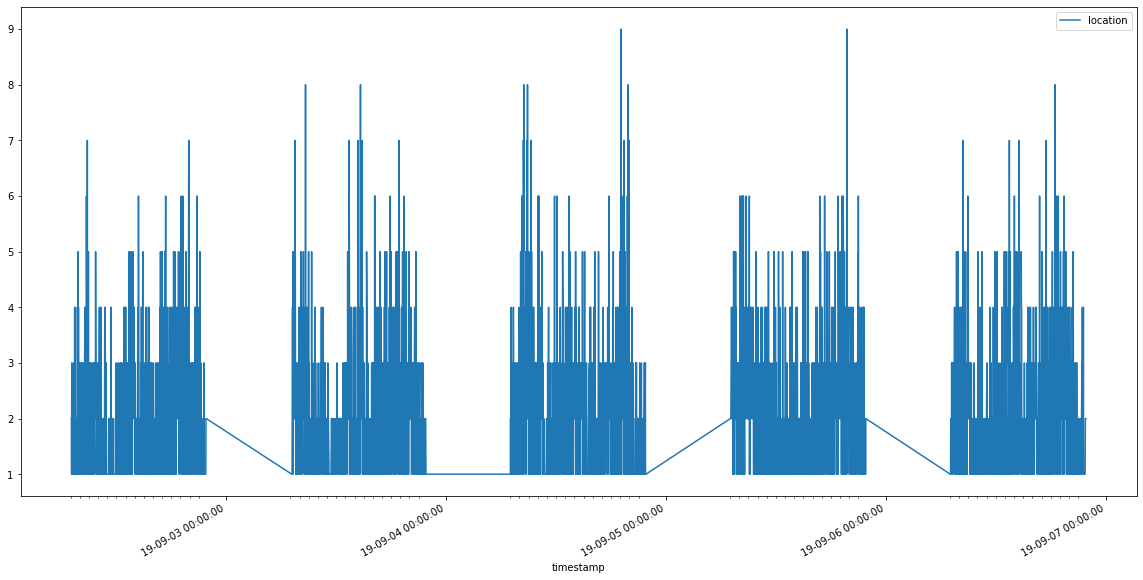

In [92]:
from matplotlib.dates import DayLocator, HourLocator, DateFormatter, drange
import matplotlib.axes
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
from datetime import timedelta

#fig, ax = plt.subplots()
ax = df_tms[['location']].plot(figsize=(20,10))

ax.xaxis.set_major_locator(DayLocator())
ax.xaxis.set_minor_locator(HourLocator(range(7, 22, 1)))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%y-%m-%d %H:%M:%S'))



#dates = range('2019-09-02 07:00:00', '2019-09-06 22:00:00')
#ticklabels = df.index('%d %H')

#ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))
#ticks_lst = 

#xticks(['January', 'February', 'March'], rotation=20)

In [93]:


time_customers = pd.DataFrame(df.groupby(by=['day', 'customer_no']).agg({'timestamp': ['max','min']}))

In [94]:
time_customers

timestamp                    
                                      max                 min
day       customer_no                                        
Friday    1           2019-09-06 07:05:00 2019-09-06 07:00:00
          2           2019-09-06 07:01:00 2019-09-06 07:00:00
          3           2019-09-06 07:11:00 2019-09-06 07:00:00
          4           2019-09-06 07:02:00 2019-09-06 07:01:00
          5           2019-09-06 07:15:00 2019-09-06 07:01:00
...                                   ...                 ...
Wednesday 1527        2019-09-04 21:47:00 2019-09-04 21:44:00
          1528        2019-09-04 21:48:00 2019-09-04 21:45:00
          1529        2019-09-04 21:49:00 2019-09-04 21:45:00
          1530        2019-09-04 21:49:00 2019-09-04 21:46:00
          1531        2019-09-04 21:49:00 2019-09-04 21:46:00

[7445 rows x 2 columns]

In [95]:
time_customers.dtypes

timestamp  max    datetime64[ns]
           min    datetime64[ns]
dtype: object

In [96]:
time_customers['time_in_sup']=time_customers['timestamp']['max'] - time_customers['timestamp']['min']

In [97]:
time_customers

timestamp                         time_in_sup
                                      max                 min                
day       customer_no                                                        
Friday    1           2019-09-06 07:05:00 2019-09-06 07:00:00 0 days 00:05:00
          2           2019-09-06 07:01:00 2019-09-06 07:00:00 0 days 00:01:00
          3           2019-09-06 07:11:00 2019-09-06 07:00:00 0 days 00:11:00
          4           2019-09-06 07:02:00 2019-09-06 07:01:00 0 days 00:01:00
          5           2019-09-06 07:15:00 2019-09-06 07:01:00 0 days 00:14:00
...                                   ...                 ...             ...
Wednesday 1527        2019-09-04 21:47:00 2019-09-04 21:44:00 0 days 00:03:00
          1528        2019-09-04 21:48:00 2019-09-04 21:45:00 0 days 00:03:00
          1529        2019-09-04 21:49:00 2019-09-04 21:45:00 0 days 00:04:00
          1530        2019-09-04 21:49:00 2019-09-04 21:46:00 0 days 00:03:00
          1531        2019-09-04 21:49:00 2019-09-04 21:46:00 0 days 00:03:00

[7445 rows x 3 columns]

In [98]:
time_customers['time_in_sup'].mean()

Timedelta('0 days 00:06:14.409670920')

In [99]:
time_customers['time_in_sup'].max()

Timedelta('0 days 00:52:00')

In [100]:
time_customers['time_in_sup'].min()

Timedelta('0 days 00:00:00')